In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('Price_weight.csv')
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [45]:
df.shape

(7, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [47]:
df.columns

Index(['Weight', 'Price'], dtype='object')

In [48]:
df.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [49]:
x=df['Weight']
y=df['Price']

In [50]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [51]:
mean_x

4.571428571428571

In [52]:
mean_y

47.142857142857146

In [53]:
dev_x = x - mean_x
dev_y = y - mean_y

In [54]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
print(m)

2.620967741935484


In [55]:
c = mean_y - (m*mean_x)
print(c)

35.16129032258065


In [56]:
pred_2= m*2 + c
pred_2

40.403225806451616

In [57]:
2.620967741935484*2+35.16129032258065


40.403225806451616

Text(0.5, 1.0, 'Price Chart Per Weight')

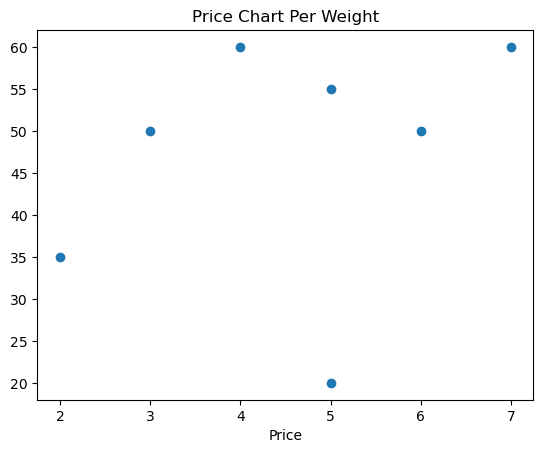

In [58]:
plt.scatter(x,y)
plt.xlabel('Weight')
plt.xlabel('Price')
plt.title('Price Chart Per Weight')

In [59]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
reg=LinearRegression()


In [62]:
reg.fit(df[['Weight']],df['Price'])

LinearRegression()

In [63]:
reg.coef_

array([2.62096774])

In [64]:
print(c,m)

35.16129032258065 2.620967741935484


In [65]:
reg.predict([[5]])
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [66]:
df['Predicted'] = reg.predict(df[['Weight']])
df.head()

,Weight,Price,Predicted
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [69]:
df['residuals'] = df['Weight'] - df['Predicted']
df.head()

,Weight,Price,Predicted,residuals
0,2,35,40.403226,-38.403226
1,4,60,45.645161,-41.645161
2,5,20,48.266129,-43.266129
3,3,50,43.024194,-40.024194
4,6,50,50.887097,-44.887097


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
mse=mean_squared_error(df[['Predicted']],df['Price'])
mse

167.30990783410135

In [75]:
mae=mean_absolute_error(df[['Predicted']],df['Price'])
mae

9.87327188940092

In [76]:
mae = mean_absolute_error(df.Predicted , df.Price)
mae

9.87327188940092

Best Fit Line

Text(0.5, 1.0, 'Wight Vs Price')

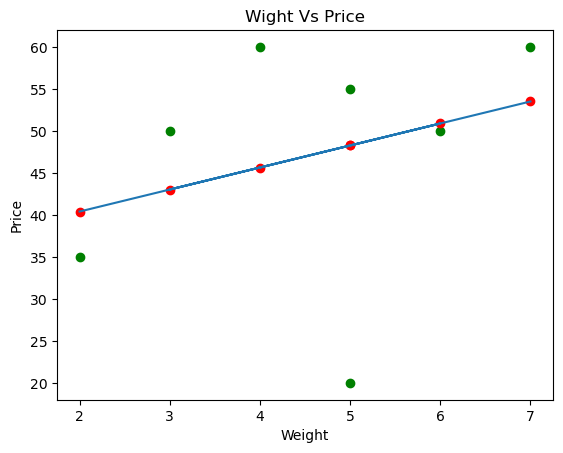

In [78]:
plt.scatter(x,y, color='green')

plt.plot(x, df.Predicted)
plt.scatter(x, df.Predicted, color='red')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Wight Vs Price')

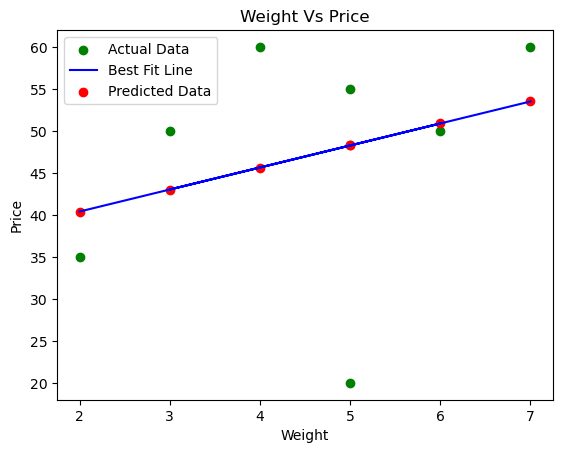

In [94]:
m = reg.coef_[0]  
c = reg.intercept_  

#equation of the line
equation = f"y = {m:.2f}x + {c:.2f}"

# plot the data
plt.scatter(df['Weight'], df['Price'], color='green', label="Actual Data")  # Original data points
plt.plot(df['Weight'], reg.predict(df[['Weight']]), color='blue', label="Best Fit Line")  # Regression line
plt.scatter(df['Weight'], reg.predict(df[['Weight']]), color='red', label="Predicted Data")  # Predicted points

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight Vs Price')

# Adding a legend
plt.legend()
plt.savefig("Weight_Vs_Price.jpg")

# Showing the plot
plt.show()